<a href="https://colab.research.google.com/github/angelmetanosaa/DTI-Clustering-Mall-Customer-Segmentation-Data/blob/main/DTI_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering atau Klasterisasi adalah metode pengelompokan data. Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompok yang tidak dikenal dalam data. 

Task yang dilakukan adalah mengelompokkan data kartu anggota dari konsumen sebuah mall. Dataset ini memiliki jumlah row 200 buah data dengan 5 atribut. Berikut adalah atribut-atribut yang terdapat pada dataset:

- CustomerID : Nomor ID konsumen
- Gender : Jenis Kelamin Konsumen Mall dari konsumen
- Age : Usia konsumen
- Anual Income (k$) : Pendapatan konsumen setiap tahunnya
- Spending Score (1-100) : Skor yang ditetapkan oleh mall berdasarkan perilaku pelanggan dan sifat pembelanjaan.


# **Import Data**

In [1]:
#import library

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

# Load Data

In [2]:
#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
#import io untuk membaca dataset yang telah diupload
import io
#membaca data csv yang telah diupload dengan nama Mall_Customers
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['Mall_Customers.csv']),index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
#menampilkan data yang telah dibaca
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# mengecek null pada dataset
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Drop kolom CustomerID
df_new = df.drop(['Gender'] ,axis=1)
df_new.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
6,22,17,76
7,35,18,6
8,23,18,94
9,64,19,3


In [7]:
# Menampilkan Descriptive Statistics
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# Data Preprocessing

In [8]:
df_scaled = df_new.copy()
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_scaled.columns.tolist()
df_scaled[column_names] = scaler.fit_transform(df_scaled[column_names])
df_scaled.sort_index(inplace=True)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [9]:
df_scaled

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980
...,...,...,...
196,-0.276302,2.268791,1.118061
197,0.441365,2.497807,-0.861839
198,-0.491602,2.497807,0.923953


Text(0, 0.5, 'Annual Spend')

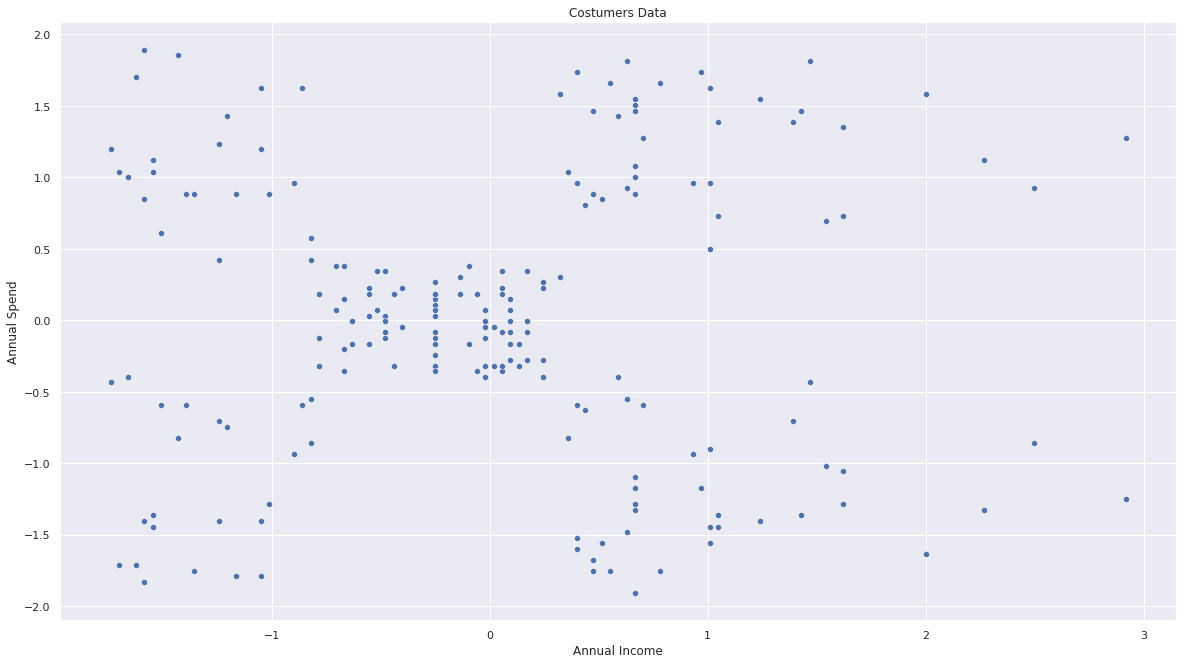

In [10]:
# Membuat Plot
sns.set() 
plt.rcParams['figure.figsize'] = (20, 11)

# Visualisasi Data
sns.scatterplot (x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df_scaled)
plt.title('Costumers Data')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

# **Clustering**

## **K-Means**

### **Elbow Methode**

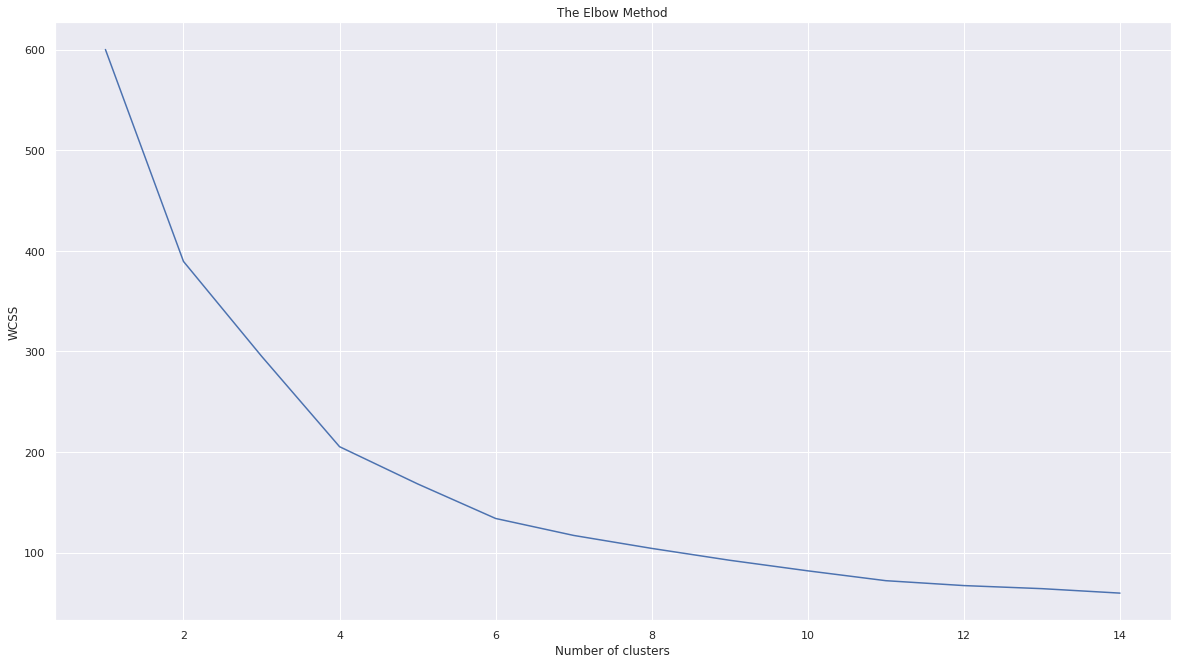

In [11]:
#menggunakan elbow method untuk menemukan nomor cluster yang optimal menggunakan sklearn libraries
#import library
from sklearn.cluster import KMeans
#membuat array dengan nama wcss
wcss = []
#melakukan perulangan dari 1 sampai 15
for i in range(1, 15):
    #membuat nama variabel = kmeans yang mendeskripsikan jumlah cluster, perulangan k-means, dan random statenya
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
#menampilkan plot wcss

plt.plot(range(1, 15), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

### **Cluster = 4**

In [12]:
df_4c = df_scaled

clustering_kmeans = KMeans(n_clusters=4)
df_4c['cluster'] = clustering_kmeans.fit_predict(df_4c)

df_4c.loc[df_4c['cluster'] == 0, 'color'] = 'r'
df_4c.loc[df_4c['cluster'] == 1, 'color'] = 'g'
df_4c.loc[df_4c['cluster'] == 2, 'color'] = 'b'
df_4c.loc[df_4c['cluster'] == 3, 'color'] = 'y'

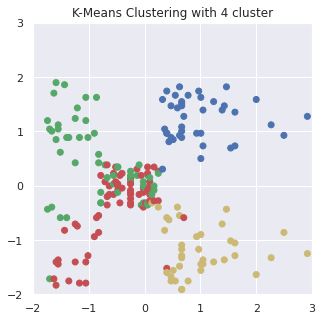

In [13]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_4c['Annual Income (k$)'], df_4c['Spending Score (1-100)'], color =df_4c['color'])
plt.title('K-Means Clustering with 4 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [14]:
df_4c['cluster'].value_counts()

0    65
1    57
2    40
3    38
Name: cluster, dtype: int64

In [15]:
df_4c.drop(df_4c.columns[df_4c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Cluster = 5**

In [16]:
df_5c = df_scaled

clustering_kmeans = KMeans(n_clusters = 5)
df_5c['cluster'] = clustering_kmeans.fit_predict(df_4c)

df_5c.loc[df_5c['cluster'] == 0, 'color'] = 'r'
df_5c.loc[df_5c['cluster'] == 1, 'color'] = 'g'
df_5c.loc[df_5c['cluster'] == 2, 'color'] = 'b'
df_5c.loc[df_5c['cluster'] == 3, 'color'] = 'y'
df_5c.loc[df_5c['cluster'] == 4, 'color'] = 'c'

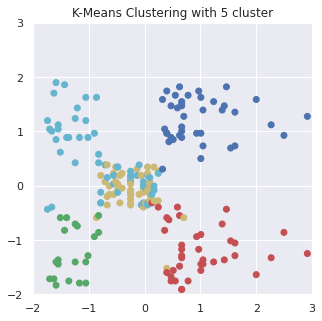

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_5c['Annual Income (k$)'], df_4c['Spending Score (1-100)'], color =df_5c['color'])
plt.title('K-Means Clustering with 5 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [18]:
df_5c.drop(df_5c.columns[df_5c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Cluster = 6**

In [19]:
df_6c = df_scaled

clustering_kmeans = KMeans(n_clusters = 6)
df_6c['cluster'] = clustering_kmeans.fit_predict(df_6c)

df_6c.loc[df_6c['cluster'] == 0, 'color'] = 'r'
df_6c.loc[df_6c['cluster'] == 1, 'color'] = 'g'
df_6c.loc[df_6c['cluster'] == 2, 'color'] = 'b'
df_6c.loc[df_6c['cluster'] == 3, 'color'] = 'y'
df_6c.loc[df_6c['cluster'] == 4, 'color'] = 'c'
df_6c.loc[df_6c['cluster'] == 5, 'color'] = 'm'

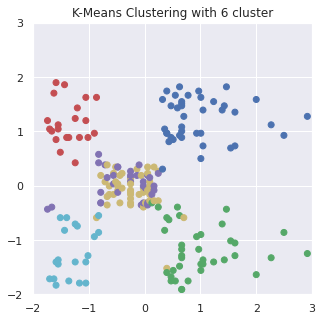

In [20]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_6c['Annual Income (k$)'], df_6c['Spending Score (1-100)'], color = df_6c['color'])
plt.title('K-Means Clustering with 6 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [21]:
df_6c.drop(df_6c.columns[df_6c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Cluster 7**

In [22]:
df_7c = df_scaled

clustering_kmeans = KMeans(n_clusters = 7)
df_7c['cluster'] = clustering_kmeans.fit_predict(df_7c)

df_7c.loc[df_7c['cluster'] == 0, 'color'] = 'r'
df_7c.loc[df_7c['cluster'] == 1, 'color'] = 'g'
df_7c.loc[df_7c['cluster'] == 2, 'color'] = 'b'
df_7c.loc[df_7c['cluster'] == 3, 'color'] = 'y'
df_7c.loc[df_7c['cluster'] == 4, 'color'] = 'c'
df_7c.loc[df_7c['cluster'] == 5, 'color'] = 'm'
df_7c.loc[df_7c['cluster'] == 6, 'color'] = 'black'


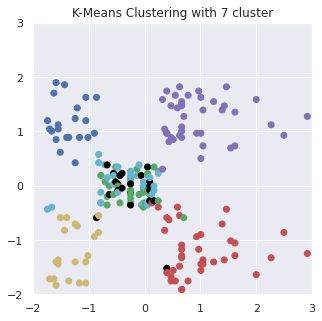

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_7c['Annual Income (k$)'], df_7c['Spending Score (1-100)'], color = df_7c['color'])
plt.title('K-Means Clustering with 7 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [24]:
df_7c.drop(df_7c.columns[df_7c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Silhoutte Method**

In [25]:
# Silhoutte Method
from sklearn.metrics import silhouette_score

sil_score = []

for n_cluster in range(4, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_scaled, label, metric='euclidean')
    sil_score.append(sil_coeff)
    print('Nilai Silhoutte Method untuk n_clusters = {} adalah {}'.format(n_cluster, sil_coeff))

Nilai Silhoutte Method untuk n_clusters = 4 adalah 0.48937372257954354
Nilai Silhoutte Method untuk n_clusters = 5 adalah 0.5295494002915597
Nilai Silhoutte Method untuk n_clusters = 6 adalah 0.5671307319420603
Nilai Silhoutte Method untuk n_clusters = 7 adalah 0.5725401195103543


Pada metode K-Means Clustering ini telah dicoba jumlah cluster dari 4, 5, 6 dan 7. Karena pada grafik Methode Elbom didapatkan nilai cluster terbaiik ada pada range tersebut.

Kemudia, dilakukan evaluasi nilai cluster mengggunakan Silhoutte Method. Didapatkan nilai terbesar ada pada jumlah cluster = 7

# **K-Medoids Clustering**

In [33]:
!pip install scikit-learn-extra

     |████████████████████████████████| 624kB 3.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=340343 sha256=2e2e964b6a8502547f6f5d57688d3e2f6ecf24d532b1afb8c55e0d834842777d
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [34]:
from sklearn_extra.cluster import KMedoids

### **Cluster 4**

In [36]:
df_4m = df_scaled

clustering_kmedoids = KMedoids(n_clusters=4)
df_4m['cluster'] = clustering_kmedoids.fit_predict(df_4m)

df_4m.loc[df_4m['cluster'] == 0, 'color'] = 'r'
df_4m.loc[df_4m['cluster'] == 1, 'color'] = 'g'
df_4m.loc[df_4m['cluster'] == 2, 'color'] = 'b'
df_4m.loc[df_4m['cluster'] == 3, 'color'] = 'y'

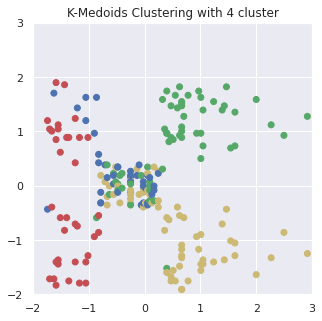

In [37]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_4m['Annual Income (k$)'], df_4m['Spending Score (1-100)'], color =df_4c['color'])
plt.title('K-Medoids Clustering with 4 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [40]:
df_4m['cluster'].value_counts()

3    65
1    61
2    38
0    36
Name: cluster, dtype: int64

In [39]:
df_4m.drop(df_4m.columns[df_4m.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Cluster 5**

In [41]:
df_5m = df_scaled

clustering_kmedoids = KMedoids(n_clusters=5)
df_5m['cluster'] = clustering_kmedoids.fit_predict(df_5m)

df_5m.loc[df_5m['cluster'] == 0, 'color'] = 'r'
df_5m.loc[df_5m['cluster'] == 1, 'color'] = 'g'
df_5m.loc[df_5m['cluster'] == 2, 'color'] = 'b'
df_5m.loc[df_5m['cluster'] == 3, 'color'] = 'y'
df_5m.loc[df_5m['cluster'] == 4, 'color'] = 'c'

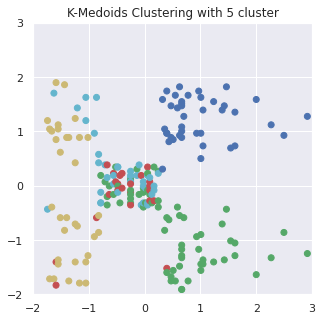

In [43]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_5m['Annual Income (k$)'], df_5m['Spending Score (1-100)'], color = df_5m['color'])
plt.title('K-Medoids Clustering with 5 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [45]:
df_5m['cluster'].value_counts()

1    65
2    40
4    38
3    34
0    23
Name: cluster, dtype: int64

In [44]:
df_5m.drop(df_5m.columns[df_5m.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Cluster 6**

In [46]:
df_6m = df_scaled

clustering_kmedoids = KMedoids(n_clusters=6)
df_6m['cluster'] = clustering_kmedoids.fit_predict(df_6m)

df_6m.loc[df_6m['cluster'] == 0, 'color'] = 'r'
df_6m.loc[df_6m['cluster'] == 1, 'color'] = 'g'
df_6m.loc[df_6m['cluster'] == 2, 'color'] = 'b'
df_6m.loc[df_6m['cluster'] == 3, 'color'] = 'y'
df_6m.loc[df_6m['cluster'] == 4, 'color'] = 'c'
df_6m.loc[df_6m['cluster'] == 5, 'color'] = 'm'

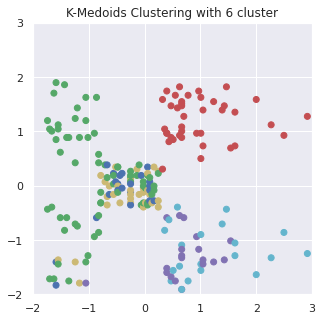

In [47]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_6m['Annual Income (k$)'], df_6m['Spending Score (1-100)'], color = df_6m['color'])
plt.title('K-Medoids Clustering with 6 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [48]:
df_6m['cluster'].value_counts()

1    68
0    40
3    31
2    22
4    20
5    19
Name: cluster, dtype: int64

In [49]:
df_5m.drop(df_5m.columns[df_6m.columns.str.contains('color',case = False)],axis = 1, inplace = True)

### **Cluster 7**

In [50]:
df_7m = df_scaled

clustering_kmedoids = KMedoids(n_clusters=7)
df_7m['cluster'] = clustering_kmedoids.fit_predict(df_7m)

df_7m.loc[df_7c['cluster'] == 0, 'color'] = 'r'
df_7m.loc[df_7c['cluster'] == 1, 'color'] = 'g'
df_7m.loc[df_7c['cluster'] == 2, 'color'] = 'b'
df_7m.loc[df_7c['cluster'] == 3, 'color'] = 'y'
df_7m.loc[df_7c['cluster'] == 4, 'color'] = 'c'
df_7m.loc[df_7c['cluster'] == 5, 'color'] = 'm'
df_7m.loc[df_7c['cluster'] == 6, 'color'] = 'black'


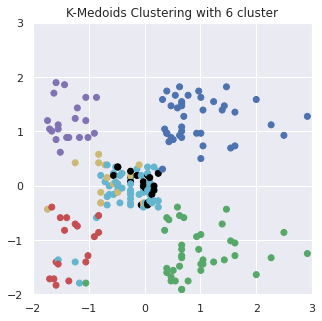

In [51]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_7m['Annual Income (k$)'], df_7m['Spending Score (1-100)'], color = df_6m['color'])
plt.title('K-Medoids Clustering with 6 cluster')
plt.xlim(-2, 3) 
plt.ylim(-2, 3)
plt.show()

In [52]:
df_7m['cluster'].value_counts()

4    51
2    40
1    39
5    20
6    19
0    17
3    14
Name: cluster, dtype: int64

In [53]:
df_5m.drop(df_5m.columns[df_6m.columns.str.contains('color',case = False)],axis = 1, inplace = True)

## **Silhoutte Method**

In [56]:
silhouette_avg = metrics.silhouette_score(df_4m, df_4m['cluster'])
print ('Nilai Silhoutte Method untuk n_clusters = 4 adalah ', silhouette_avg)

Nilai Silhoutte Method untuk n_clusters = 4 adalah  0.5485555568311016


In [57]:
silhouette_avg = metrics.silhouette_score(df_5m, df_5m['cluster'])
print ('Nilai Silhoutte Method untuk n_clusters = 5 adalah ', silhouette_avg)

Nilai Silhoutte Method untuk n_clusters = 5 adalah  0.5485555568311016


In [58]:
silhouette_avg = metrics.silhouette_score(df_6m, df_6m['cluster'])
print ('Nilai Silhoutte Method untuk n_clusters = 6 adalah {} ', silhouette_avg)

Nilai Silhoutte Method untuk n_clusters = 6 adalah {}  0.5485555568311016


In [59]:
silhouette_avg = metrics.silhouette_score(df_7m, df_7m['cluster'])
print ('Nilai Silhoutte Method untuk n_clusters = 7 adalah ', silhouette_avg)

Nilai Silhoutte Method untuk n_clusters = 7 adalah  0.5485555568311016


Pada metode K-Medoids Clustering ini telah dicoba jumlah cluster dari 4, 5, 6 dan 7. Karena pada grafik Methode Elbom didapatkan nilai cluster terbaiik ada pada range tersebut.

Kemudian, dilakukan evaluasi nilai cluster mengggunakan Silhoutte Method. Tidak didapatkan perbedaan nilai Silhoutte Methode pada metode clustering ini sehingga tidak bisa menyimpulkan nilai cluster terbaiknya